### Feed Forward NN model results using company: Grendene (GRND3)

**Feed forward neural networks** are also quite old — the approach originates from 50s. 

Generally it follows the following rules:
    
    1) all nodes are fully connected
    
    2) activation flows from input layer to output, without back loops
    
    3) there is one layer between input and output (hidden layer)

In most cases this type of networks is trained using Backpropagation method.

<img src="./img/ff.png" alt="Drawing" style="width: 200px;"/>

In [1]:
import tcc_utils
import tratamento_dados_empresa
from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni
from keras.callbacks import EarlyStopping

x_csv_path = './data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = './data/grendene-cotacao-raw.csv'

X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

es = EarlyStopping(monitor='val_loss', verbose=1, patience=50)

Using TensorFlow backend.


 ### 1) Feed Forward NN

  80% train / 20% test / 0% validation split
  
  **kernel_initializer:** random_uniform
  
  **layers:** input(X columns), (X columns), output(1)
  
  **activations:** input(none), 'relu', output(none)
  
  **optimizer:** adam
  
  **loss:** MSE

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
<IPython.core.display.Image object>
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 57        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

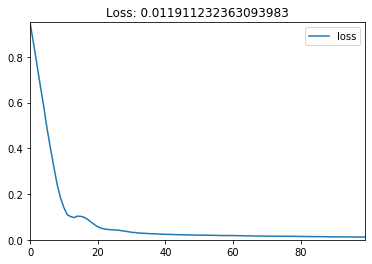

    Prediction      Real    % error
8     7.189553  8.491036  15.327731
0     6.819716  8.075241  15.547827
7     6.039208  5.156991  17.107221
9     4.665866  4.785659   2.503155
2     4.758214  4.616062   3.079512
1     4.221490  3.669486  15.043089
6     4.868833  3.491649  39.442215
3     2.626214  3.003443  12.559905
10    1.308982  1.377930   5.003787
5     1.293777  0.900556  43.664234
4     0.802914  0.667981  20.200180


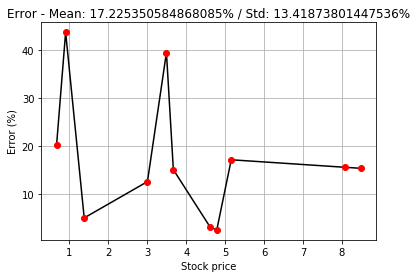

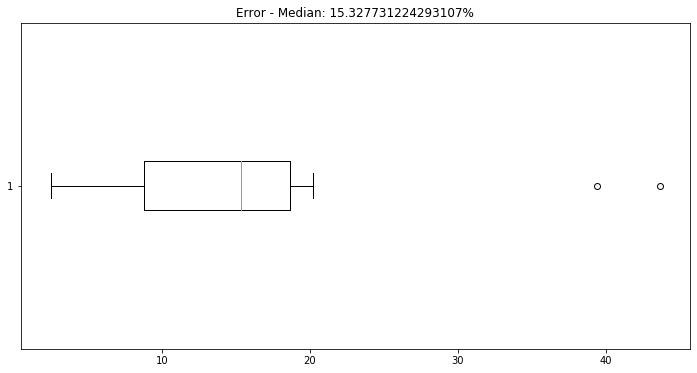

count    11.000000
mean     17.225351
std      13.418738
min       2.503155
25%       8.781846
50%      15.327731
75%      18.653701
max      43.664234
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
    Prediction      Real    % error
8     7.189553  8.491036  15.327731
0     6.819716  8.075241  15.547827
7     6.039208  5.156991  17.107221
9     4.665866  4.785659   2.503155
2     4.758214  4.616062   3.079512
1     4.221490  3.669486  15.043089
3     2.626214  3.003443  12.559905
10    1.308982  1.377930   5.003787
4     0.802914  0.667981  20.200180


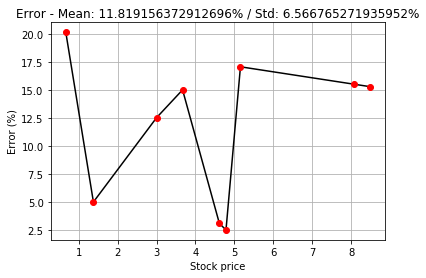

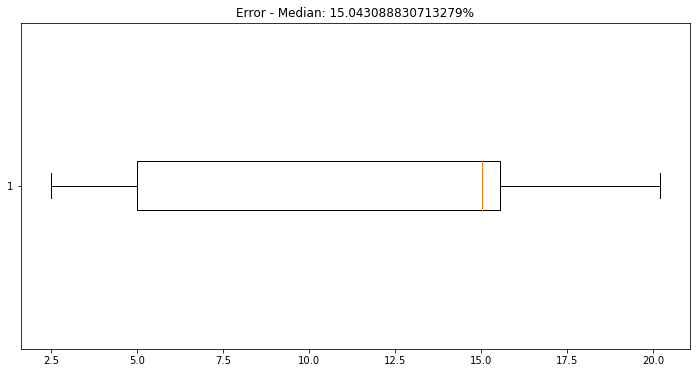

count     9.000000
mean     11.819156
std       6.566765
min       2.503155
25%       5.003787
50%      15.043089
75%      15.547827
max      20.200180
Name: % error, dtype: float64
MSE of training: 0.011763981797478416
MSE of testing: 0.09663693606853485
MSE of testing without first outliers: 0.08142693340778351


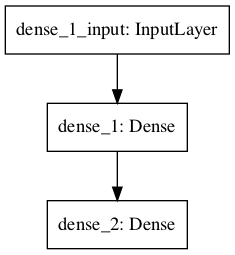

In [2]:
from keras.utils import plot_model
# Keras Initializer with seed
random_uniform = rnd_uni(minval=-0.05, maxval=0.05, seed=0)
# Neural Network layers
layers = [x_train.shape[1]]
activations = ['relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, random_uniform, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=100, verbose=0)
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler, model_name='FF 1 | rnd | adam | relu')
plot_model(deep_model)

  ### 2) Feed Forward NN with validation split

  <font color=red>72%</font> train / 20% test / <font color=red>8%</font> validation split
  
  **kernel_initializer:** random_uniform

**layers:** input(X columns), (X columns), output(1)

**activations:** input(none), 'relu', output(none)

**optimizer:** adam

**loss:** MSE

Epoch 00115: early stopping
<IPython.core.display.Image object>
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 57        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

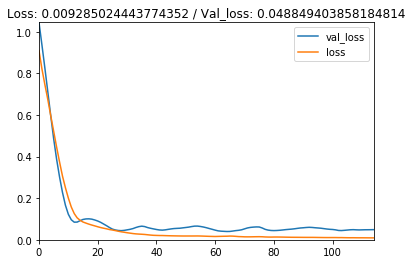

    Prediction      Real    % error
8     7.265069  8.491036  14.438373
0     7.072052  8.075241  12.423028
7     6.542096  5.156991  26.858785
9     4.513247  4.785659   5.692243
2     4.968095  4.616062   7.626253
1     4.265784  3.669486  16.250176
6     4.759412  3.491649  36.308430
3     2.542196  3.003443  15.357271
10    1.594199  1.377930  15.695200
5     1.433688  0.900556  59.200264
4     0.873271  0.667981  30.732905


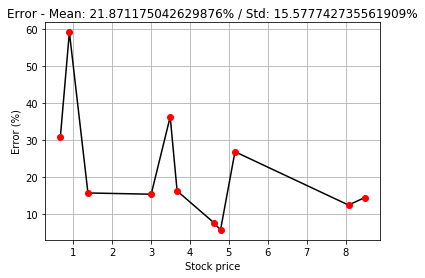

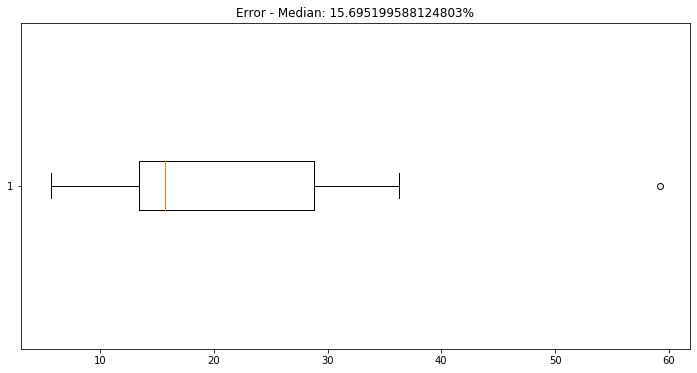

count    11.000000
mean     21.871175
std      15.577743
min       5.692243
25%      13.430700
50%      15.695200
75%      28.795845
max      59.200264
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
    Prediction      Real    % error
8     7.265069  8.491036  14.438373
0     7.072052  8.075241  12.423028
7     6.542096  5.156991  26.858785
9     4.513247  4.785659   5.692243
2     4.968095  4.616062   7.626253
1     4.265784  3.669486  16.250176
6     4.759412  3.491649  36.308430
3     2.542196  3.003443  15.357271
10    1.594199  1.377930  15.695200
4     0.873271  0.667981  30.732905


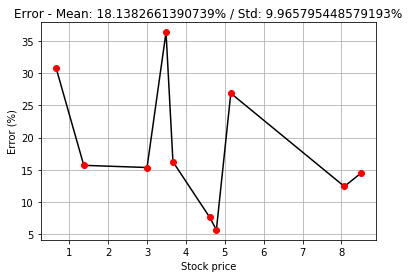

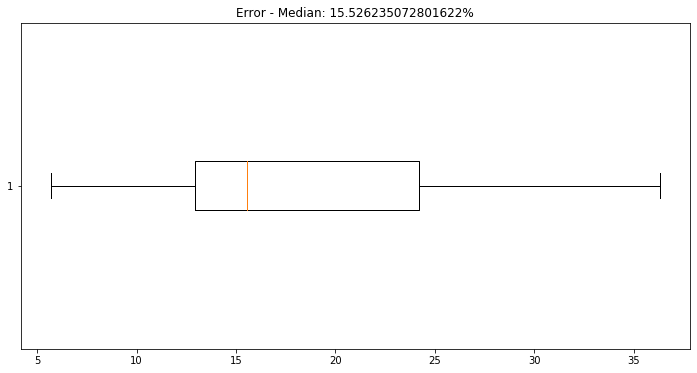

count    10.000000
mean     18.138266
std       9.965795
min       5.692243
25%      12.926864
50%      15.526235
75%      24.206633
max      36.308430
Name: % error, dtype: float64
MSE of training: 0.01732239228757945
MSE of testing: 0.10498368740081787
MSE of testing without first outliers: 0.11090719699859619


In [3]:
# Keras Initializer with seed
random_uniform = rnd_uni(minval=-0.05, maxval=0.05, seed=0)
# Neural Network layers
layers = [x_train.shape[1]]
activations = ['relu']
# Create model
deep_model_with_val = tcc_utils.deep_model(x_train, random_uniform, layers, activations)
# Fit model
deep_history_with_val = deep_model_with_val.fit(x_train, y_train, epochs=1000,
                                                validation_split=0.2, verbose=0, callbacks=[es])
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model_with_val, deep_history_with_val, x_train,
                         y_train, x_test, y_test, X, y_scaler,
                         model_name='FF 2 | rnd | adam | relu | cv', val=True, existing_df=result_df)

###  3) Feed Forward NN, with glorot normal

  <font color=red>80%</font> train / 20% test / <font color=red>0%</font> validation split

**kernel_initializer:** <font color=red>glorot_normal</font>

**layers:** input(X columns), (X columns), output(1)

**activations:** input(none), 'relu', output(none)

**optimizer:** adam

**loss:** MSE

<IPython.core.display.Image object>
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 57        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

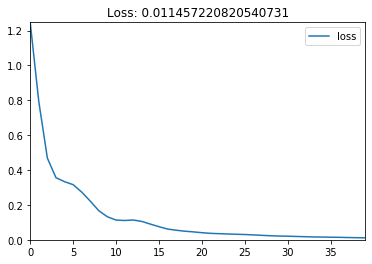

    Prediction      Real     % error
8     8.345744  8.491036    1.711120
0     7.452213  8.075241    7.715282
7     5.133736  5.156991    0.450941
9     5.461023  4.785659   14.112258
2     5.895683  4.616062   27.721052
1     4.637787  3.669486   26.387932
6     3.301685  3.491649    5.440533
3     3.509138  3.003443   16.837174
10    2.385128  1.377930   73.094929
5     0.744405  0.900556   17.339472
4     1.721216  0.667981  157.674312


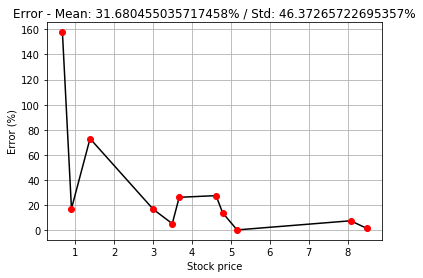

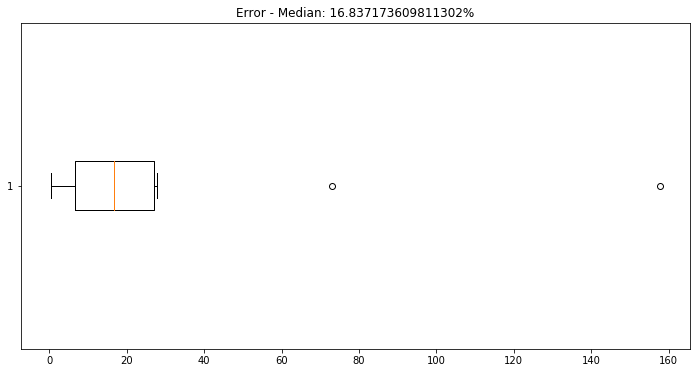

count     11.000000
mean      31.680455
std       46.372657
min        0.450941
25%        6.577908
50%       16.837174
75%       27.054492
max      157.674312
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
   Prediction      Real    % error
8    8.345744  8.491036   1.711120
0    7.452213  8.075241   7.715282
7    5.133736  5.156991   0.450941
9    5.461023  4.785659  14.112258
2    5.895683  4.616062  27.721052
1    4.637787  3.669486  26.387932
6    3.301685  3.491649   5.440533
3    3.509138  3.003443  16.837174
5    0.744405  0.900556  17.339472


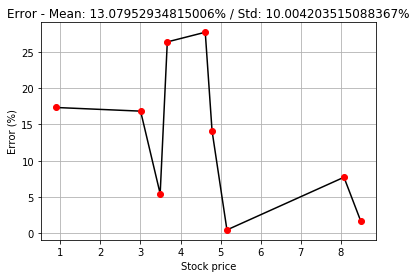

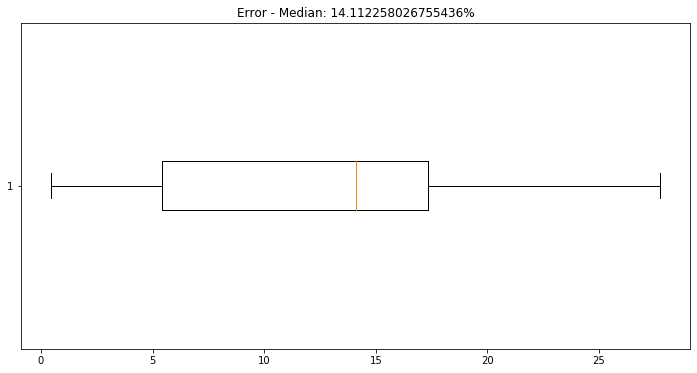

count     9.000000
mean     13.079529
std      10.004204
min       0.450941
25%       5.440533
50%      14.112258
75%      17.339472
max      27.721052
Name: % error, dtype: float64
MSE of training: 0.010841962542723526
MSE of testing: 0.08605211228132248
MSE of testing without first outliers: 0.06719349324703217


In [4]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [x_train.shape[1]]
activations = ['relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler,
                         model_name='FF 3 | glorot_normal | adam | relu', existing_df=result_df)

###  4) Feed Forward NN, with glorot normal and validation split

  <font color=red>72%</font> train / 20% test / <font color=red>8%</font> validation split
  
  **kernel_initializer:** glorot_normal

**layers:** input(X columns), (X columns), output(1)

**activations:** input(none), 'relu', output(none)

**optimizer:** adam

**loss:** MSE

Epoch 00130: early stopping
<IPython.core.display.Image object>
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 57        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

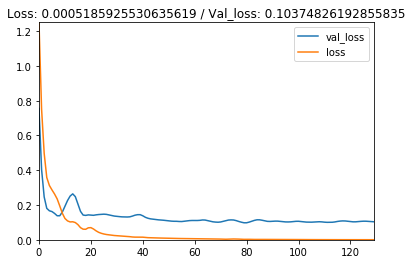

    Prediction      Real     % error
8     8.433802  8.491036    0.674056
0     7.569798  8.075241    6.259163
7     5.398144  5.156991    4.676238
9     5.957226  4.785659   24.480798
2     5.499147  4.616062   19.130703
1     4.626319  3.669486   26.075398
6     2.839074  3.491649   18.689601
3     4.030767  3.003443   34.204885
10    3.764137  1.377930  173.173183
5     1.189659  0.900556   32.102649
4     2.044309  0.667981  206.042908


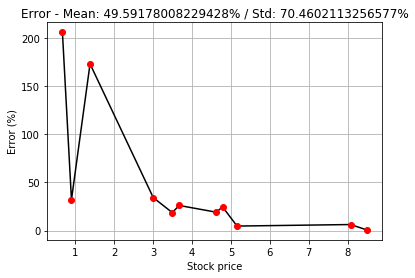

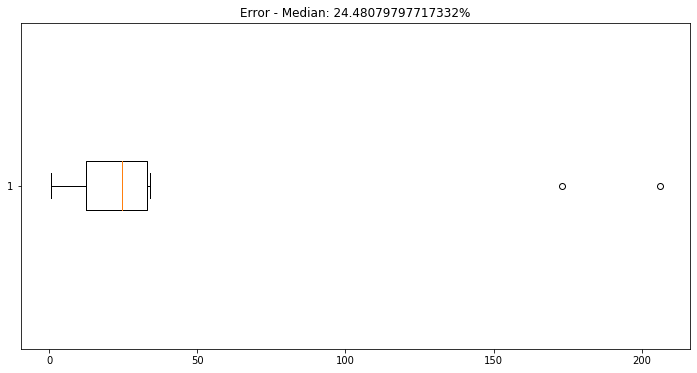

count     11.000000
mean      49.591780
std       70.460211
min        0.674056
25%       12.474382
50%       24.480798
75%       33.153767
max      206.042908
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
   Prediction      Real    % error
8    8.433802  8.491036   0.674056
0    7.569798  8.075241   6.259163
7    5.398144  5.156991   4.676238
9    5.957226  4.785659  24.480798
2    5.499147  4.616062  19.130703
1    4.626319  3.669486  26.075398
6    2.839074  3.491649  18.689601
3    4.030767  3.003443  34.204885
5    1.189659  0.900556  32.102649


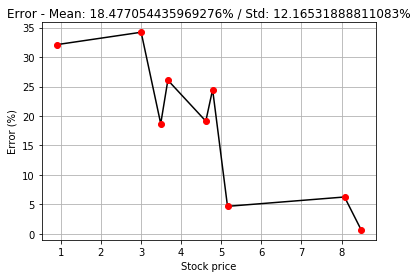

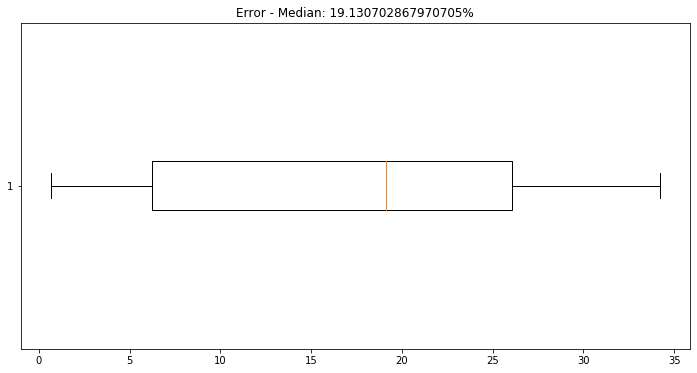

count     9.000000
mean     18.477054
std      12.165319
min       0.674056
25%       6.259163
50%      19.130703
75%      26.075398
max      34.204885
Name: % error, dtype: float64
MSE of training: 0.021636016201227903
MSE of testing: 0.18346041440963745
MSE of testing without first outliers: 0.0885203406214714


In [5]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [x_train.shape[1]]
activations = ['relu']
# Create model
deep_model_with_val = tcc_utils.deep_model(x_train, glorot_normal, layers, activations)
# Fit model
deep_history_with_val = deep_model_with_val.fit(x_train, y_train, epochs=1000,
                                                validation_split=0.2, verbose=0, callbacks=[es])
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model_with_val, deep_history_with_val, x_train,
                         y_train, x_test, y_test, X, y_scaler,
                         model_name='FF 4 | glorot_normal | adam | relu | cv', val=True, existing_df=result_df)

###  5) Feed Forward NN, with glorot uniform

  <font color=red>80%</font> train / 20% test / <font color=red>0%</font> validation split
  
  **kernel_initializer:** <font color=red>glorot_uniform</font>

**layers:** input(X columns), (X columns), output(1)

**activations:** input(none), 'relu', output(none)

**optimizer:** adam

**loss:** MSE

<IPython.core.display.Image object>
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 57        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

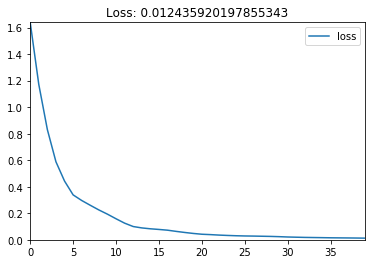

    Prediction      Real     % error
8     7.204422  8.491036   15.152620
0     6.579317  8.075241   18.524826
7     5.456407  5.156991    5.806030
9     3.773601  4.785659   21.147721
2     4.674815  4.616062    1.272783
1     5.188466  3.669486   41.394892
6     4.382871  3.491649   25.524380
3     2.914380  3.003443    2.965366
10    2.063471  1.377930   49.751465
5     0.273120  0.900556   69.672078
4     1.404714  0.667981  110.292452


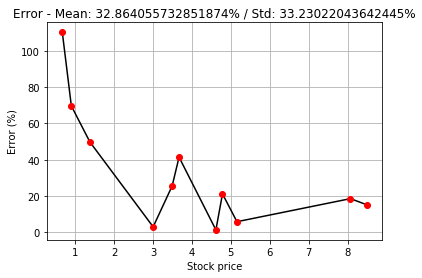

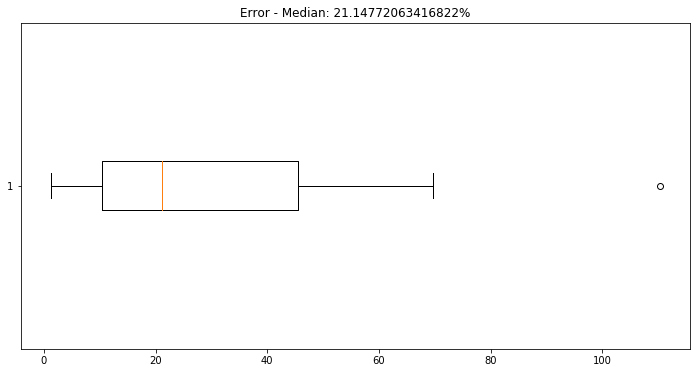

count     11.000000
mean      32.864056
std       33.230220
min        1.272783
25%       10.479325
50%       21.147721
75%       45.573178
max      110.292452
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
    Prediction      Real    % error
8     7.204422  8.491036  15.152620
0     6.579317  8.075241  18.524826
7     5.456407  5.156991   5.806030
9     3.773601  4.785659  21.147721
2     4.674815  4.616062   1.272783
1     5.188466  3.669486  41.394892
6     4.382871  3.491649  25.524380
3     2.914380  3.003443   2.965366
10    2.063471  1.377930  49.751465
5     0.273120  0.900556  69.672078


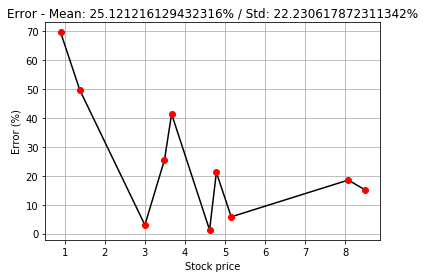

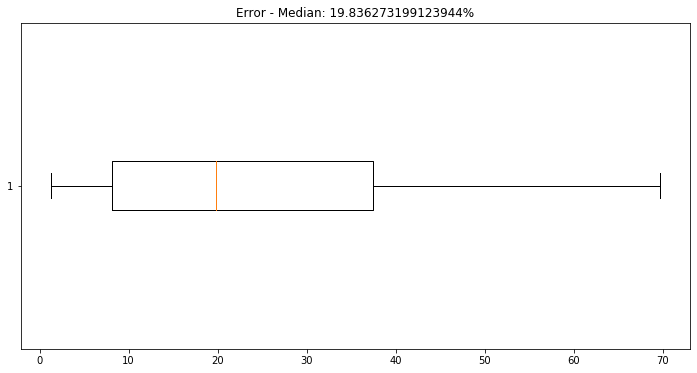

count    10.000000
mean     25.121216
std      22.230618
min       1.272783
25%       8.142678
50%      19.836273
75%      37.427264
max      69.672078
Name: % error, dtype: float64
MSE of training: 0.011692478660155426
MSE of testing: 0.13939522206783295
MSE of testing without first outliers: 0.14459840953350067


In [6]:
# Keras Initializer with seed
glorot_uniform = gl_uni(seed=0)
# Neural Network layers
layers = [x_train.shape[1]]
activations = ['relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_uniform, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler,
                         model_name='FF 5 | glorot_uniform | adam | relu', existing_df=result_df)

###  6) Feed Forward NN, with glorot uniform and validation split

  <font color=red>72%</font> train / 20% test /  <font color=red>8%</font> validation split
  
  **kernel_initializer:** glorot_uniform

**layers:** input(X columns), (X columns), output(1)

**activations:** input(none), 'relu', output(none)
  
**optimizer:** adam

**loss:** MSE

Epoch 00128: early stopping
<IPython.core.display.Image object>
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 57        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

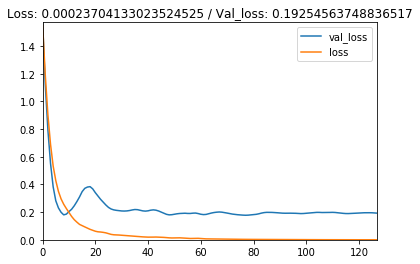

    Prediction      Real     % error
8     7.568746  8.491036   10.861924
0     7.144474  8.075241   11.526181
7     6.626892  5.156991   28.503086
9     3.989326  4.785659   16.639993
2     4.649897  4.616062    0.732981
1     5.313336  3.669486   44.797829
6     4.364403  3.491649   24.995464
3     2.929910  3.003443    2.448282
10    3.566468  1.377930  158.827879
5     0.607133  0.900556   32.582401
4     2.280300  0.667981  241.371939


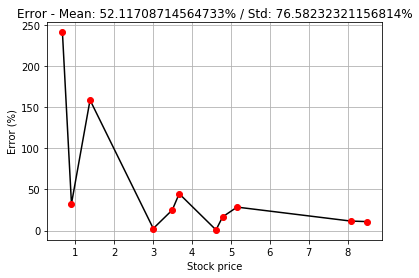

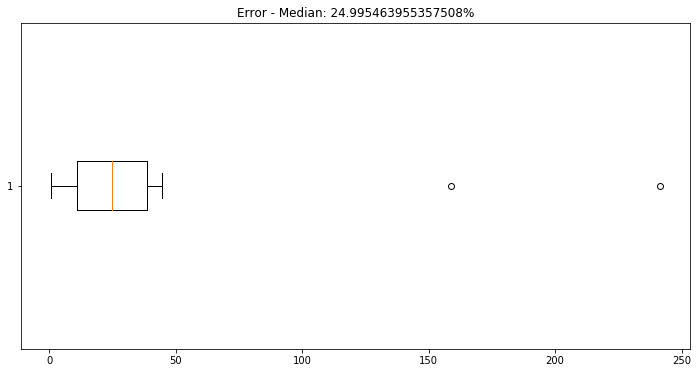

count     11.000000
mean      52.117087
std       76.582323
min        0.732981
25%       11.194053
50%       24.995464
75%       38.690115
max      241.371939
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
   Prediction      Real    % error
8    7.568746  8.491036  10.861924
0    7.144474  8.075241  11.526181
7    6.626892  5.156991  28.503086
9    3.989326  4.785659  16.639993
2    4.649897  4.616062   0.732981
1    5.313336  3.669486  44.797829
6    4.364403  3.491649  24.995464
3    2.929910  3.003443   2.448282
5    0.607133  0.900556  32.582401


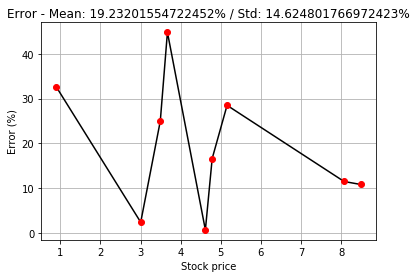

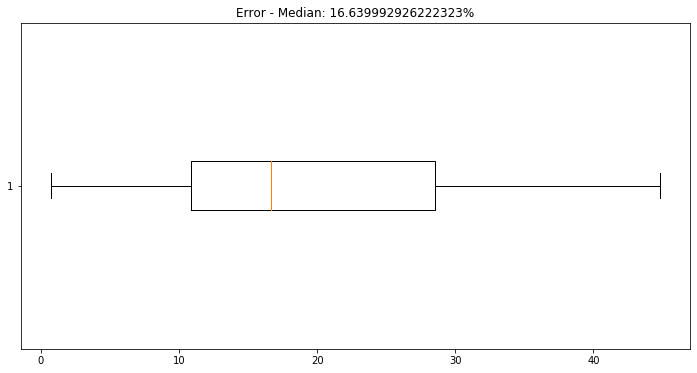

count     9.000000
mean     19.232016
std      14.624802
min       0.732981
25%      10.861924
50%      16.639993
75%      28.503086
max      44.797829
Name: % error, dtype: float64
MSE of training: 0.03956684523092752
MSE of testing: 0.2261817455291748
MSE of testing without first outliers: 0.14429403841495514


In [7]:
# Keras Initializer with seed
glorot_uniform = gl_uni(seed=0)
# Neural Network layers
layers = [x_train.shape[1]]
activations = ['relu']
# Create model
deep_model_with_val = tcc_utils.deep_model(x_train, glorot_uniform, layers, activations)
# Fit model
deep_history_with_val = deep_model_with_val.fit(x_train, y_train, epochs=1000,
                                                validation_split=0.2, verbose=0, callbacks=[es])
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model_with_val, deep_history_with_val, x_train,
                         y_train, x_test, y_test, X, y_scaler,
                         model_name='FF 6 | glorot_uniform | adam | relu | cv', val=True, existing_df=result_df)

In [8]:
import pandas as pd

df = pd.read_csv('results.csv', index_col=0)
final = df.append(result_df, ignore_index=True)
final.to_csv(r'results.csv')

In [9]:
result_df.sort_values(by='Testing MSE after removing outlier')

,Model Name,Testing MSE,Testing MSE after removing outlier,Training MSE
2,FF 3 | glorot_normal | adam | relu,0.086052,0.067193,0.010842
0,FF 1 | rnd | adam | relu,0.096637,0.081427,0.011764
3,FF 4 | glorot_normal | adam | relu | cv,0.183460,0.088520,0.021636
1,FF 2 | rnd | adam | relu | cv,0.104984,0.110907,0.017322
5,FF 6 | glorot_uniform | adam | relu | cv,0.226182,0.144294,0.039567
4,FF 5 | glorot_uniform | adam | relu,0.139395,0.144598,0.011692
